# Naive Bayes Implementation

# Text classification :- find the document is of education or cinema class

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
train_docs = pd.read_csv('example_train.csv')
train_docs.head()

,Document,Class
0,Upgrad is a great educational institution.,education
1,Educational greatness depends on ethics,education
2,A story of great ethics and educational greatness,education
3,Sholey is a great cinema,cinema
4,good movie depends on good story,cinema


In [6]:
train_docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  5 non-null      object
 1   Class     5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [9]:
train_docs['Class'] = train_docs['Class'].map({'education':1 , 'cinema':0})
train_docs

,Document,Class
0,Upgrad is a great educational institution.,1
1,Educational greatness depends on ethics,1
2,A story of great ethics and educational greatness,1
3,Sholey is a great cinema,0
4,good movie depends on good story,0


In [10]:
#convert these to x_train adn y_train
X_train_array = train_docs.values
X_train_array

array([['Upgrad is a great educational institution.', 1],
       ['Educational greatness depends on ethics', 1],
       ['A story of great ethics and educational greatness', 1],
       ['Sholey is a great cinema', 0],
       ['good movie depends on good story', 0]], dtype=object)

In [14]:
X_train =  X_train_array[:,0]
y_train = X_train_array[:,1]
y_train= y_train.astype('int')

In [19]:
y_train

array([1, 1, 1, 0, 0])

## Creating the Bag of words 

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# create object of count vectorizer class 
vec = CountVectorizer()
# basically it will create the vocablury


In [25]:
vec.fit(X_train)
vec.vocabulary_

{'upgrad': 15,
 'is': 9,
 'great': 6,
 'educational': 3,
 'institution': 8,
 'greatness': 7,
 'depends': 2,
 'on': 12,
 'ethics': 4,
 'story': 14,
 'of': 11,
 'and': 0,
 'sholey': 13,
 'cinema': 1,
 'good': 5,
 'movie': 10}

In [28]:
# remove the stop words --- will learn more in NLP

vec = CountVectorizer(stop_words='english')
vec.fit(X_train)
vec.vocabulary_

{'upgrad': 11,
 'great': 5,
 'educational': 2,
 'institution': 7,
 'greatness': 6,
 'depends': 1,
 'ethics': 3,
 'story': 10,
 'sholey': 9,
 'cinema': 0,
 'good': 4,
 'movie': 8}

In [29]:
print(vec.get_feature_names ()) 
print(len(vec.get_feature_names ()))


['cinema', 'depends', 'educational', 'ethics', 'good', 'great', 'greatness', 'institution', 'movie', 'sholey', 'story', 'upgrad']
12


In [30]:
# transform the train set to sparse matrix 
X_train_transformed  = vec.transform(X_train)
X_train_transformed

<5x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [31]:
print(X_train_transformed)

  (0, 2)	1
  (0, 5)	1
  (0, 7)	1
  (0, 11)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 6)	1
  (2, 2)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 10)	1
  (3, 0)	1
  (3, 5)	1
  (3, 9)	1
  (4, 1)	1
  (4, 4)	2
  (4, 8)	1
  (4, 10)	1


In [32]:
# converting to vanilla numpy array 
X_train_transformed.toarray()

array([[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0]], dtype=int64)

In [33]:
# converting the matrix to dataframe
pd.DataFrame(X_train_transformed.toarray()  , columns = vec.get_feature_names())

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,upgrad
0,0,0,1,0,0,1,0,1,0,0,0,1
1,0,1,1,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,1,0,0,0,1,0
3,1,0,0,0,0,1,0,0,0,1,0,0
4,0,1,0,0,2,0,0,0,1,0,1,0


In [35]:
# Lets convert the test set also 
test_doc = pd.read_csv('example_test.csv')
test_doc.head()

,Document,Class
0,very good educational institution,education


In [36]:
test_doc['Class']= test_doc['Class'].map({'education':1 , 'Cinema':0})
test_doc

,Document,Class
0,very good educational institution,1


In [51]:
#converting to array values
X_test_array = test_doc.values
X_test_array

array([['very good educational institution', 1]], dtype=object)

In [52]:
# creating X_test and y_test
X_test = X_test_array[:,0]
y_test = X_test_array[:,1]
y_test = y_test.astype(int)
y_test

array([1])

In [53]:
# transform the test data 
X_test_transformed = vec.transform(X_test)
print(X_test_transformed)

  (0, 2)	1
  (0, 4)	1
  (0, 7)	1


In [56]:
pd.DataFrame(X_test_transformed.toarray() ,  columns = vec.get_feature_names())

,cinema,depends,educational,ethics,good,great,greatness,institution,movie,sholey,story,upgrad
0,0,0,1,0,1,0,0,1,0,0,0,0


In [61]:
X_test = X_test_transformed.toarray()
X_test

array([[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [63]:
# building multinomial bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)

# now we have fit the model and we can predict the x_test
proba = mnb.predict_proba(X_test)
print(proba)

[[0.32808399 0.67191601]]


In [64]:
print(" probability of cinema" , proba[:,0])
print(" probability of education" , proba[:,1])

 probability of cinema [0.32808399]
 probability of education [0.67191601]


# hence we can say test doc belongs to Education

In [65]:
# bernouli 
from  sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_transformed , y_train)

prb1 = bnb.predict_proba(X_test)

In [66]:
print(" probability of cinema" , prb1[:,0])
print(" probability of education" , prb1[:,1])

 probability of cinema [0.2326374]
 probability of education [0.7673626]


# Spam Ham example 

In [89]:
docs = pd.read_table('SMSSpamCollection'  , header =None , names =['Class' ,'sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
docs.info

<bound method DataFrame.info of      Class                                                sms
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [91]:
docs.isnull().sum()

Class    0
sms      0
dtype: int64

In [92]:
type(docs)

pandas.core.frame.DataFrame

In [94]:
docs.Class.value_counts()

ham     4825
spam     747
Name: Class, dtype: int64

In [96]:
# lets check the spam rate 
(docs.Class.value_counts()/len(docs) )*100

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

In [ ]:
# 23 can see that there is 13 % spam rate and 86 % ham rate

In [97]:
# lets convert to 0 and 1 
docs['labels'] = docs['Class'].map({'ham':0 ,'spam':1})
docs.head()

,Class,sms,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [98]:
docs = docs.drop('Class'  , axis = 1)
docs.head()

,sms,labels
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [99]:
X= docs.sms
y= docs.labels

In [140]:
# train and test 
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train, y_test = train_test_split(X,y, random_state =1)
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(4179,) (4179,) (1393,) (1393,)


In [141]:
X_test

1078                         Yep, by the pretty sculpture
4028        Yes, princess. Are you going to make me moan?
958                            Welp apparently he retired
4642                                              Havent.
4674    I forgot 2 ask ü all smth.. There's a card on ...
                              ...                        
3207                                        At home also.
4655                     Hope you are having a great day.
1140    Message:some text missing* Sender:Name Missing...
1793    WIN: We have a winner! Mr. T. Foley won an iPo...
1710    U meet other fren dun wan meet me ah... Muz b ...
Name: sms, Length: 1393, dtype: object

In [142]:
#vectorizing the sentences or creating the Bag of words
from sklearn.feature_extraction.text import CountVectorizer 

vec = CountVectorizer(stop_words= 'english')
vec.fit(X_train)



CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [143]:
print(vec.vocabulary_)

{'4mths': 509, 'half': 3089, 'price': 5027, 'orange': 4626, 'line': 3852, 'rental': 5310, 'latest': 3763, 'camera': 1527, 'phones': 4822, 'free': 2780, 'phone': 4818, '11mths': 264, 'mobilesdirect': 4248, '08000938767': 50, 'update': 6673, 'or2stoptxt': 4624, 'cs': 1971, 'did': 2169, 'stitch': 6028, 'trouser': 6545, 'hope': 3260, 'enjoyed': 2436, 'new': 4442, 'content': 1867, 'text': 6321, 'stop': 6038, '61610': 563, 'unsubscribe': 6665, 'help': 3180, '08712400602450p': 98, 'provided': 5089, 'tones2you': 6473, 'uk': 6614, 'heard': 3159, 'u4': 6608, 'rude': 5443, 'chat': 1643, 'private': 5040, '01223585334': 5, 'cum': 1989, 'wan': 6852, '2c': 374, 'pics': 4837, 'gettin': 2913, 'shagged': 5628, 'pix': 4858, '8552': 660, '2end': 378, 'send': 5590, 'sam': 5487, 'xxx': 7127, 'neva': 4438, 'tell': 6289, 'noe': 4477, 'home': 3244, 'da': 2015, 'aft': 826, 'wat': 6876, 'wiskey': 7012, 'brandy': 1389, 'rum': 5450, 'gin': 2927, 'beer': 1209, 'vodka': 6798, 'scotch': 5535, 'shampain': 5637, 'wine'

In [144]:
vec.get_feature_names()

['00',
 '000',
 '008704050406',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07090201529',
 '07090298926',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08

In [145]:
len(vec.vocabulary_.keys())

7204

In [175]:
# transforming 
X_train_transformed = vec.transform(X_train)
X_test_transformed = vec.transform(X_test)
print(X_test_transformed)

  (0, 5023)	1
  (0, 7158)	1
  (1, 2959)	1
  (1, 4042)	1
  (1, 4243)	1
  (1, 5034)	1
  (1, 7160)	1
  (2, 961)	1
  (2, 6936)	1
  (3, 3142)	1
  (4, 1032)	1
  (4, 1547)	1
  (4, 2015)	1
  (4, 2750)	1
  (4, 3803)	1
  (4, 5012)	1
  (4, 5721)	1
  (4, 5821)	2
  (4, 6857)	1
  (4, 7089)	1
  (5, 1794)	1
  (5, 2988)	1
  (5, 4578)	1
  (5, 6376)	1
  (5, 6852)	1
  :	:
  (1390, 4526)	1
  (1390, 5591)	1
  (1390, 5598)	2
  (1390, 6321)	1
  (1390, 6346)	1
  (1391, 2515)	1
  (1391, 3489)	1
  (1391, 4246)	1
  (1391, 4310)	1
  (1391, 5868)	1
  (1391, 6614)	1
  (1391, 6684)	1
  (1391, 6789)	1
  (1391, 6987)	2
  (1391, 6996)	1
  (1391, 7041)	1
  (1391, 7110)	1
  (1392, 842)	1
  (1392, 2343)	1
  (1392, 2789)	1
  (1392, 3067)	1
  (1392, 4130)	2
  (1392, 4354)	1
  (1392, 5396)	1
  (1392, 6852)	1


In [154]:
# Building model 
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transformed  ,y_train)

y_test_pred_prob =mnb.predict_proba(X_test_transformed)
y_test_pred_class =mnb.predict(X_test_transformed)

In [155]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Model  EValuation

In [156]:
from sklearn import metrics
metrics.accuracy_score(y_test , y_test_pred_class)

0.9877961234745154

In [159]:
confusion = metrics.confusion_matrix(y_test, y_test_pred_class)

In [158]:
help(metrics.confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the m

In [ ]:
# In binary classification , you have go back to business problem and decide which class of target you want to focus more
# spam is 1 and ham is zero --> important would be not classifying the ham as spam 

# Type 1 error --> classifying spam as ham .. that is most of the time fine --> if you select lower cutoff
# Type 2 error --> classifying ham as spam --> so this we have to reduced more --> if you select higher cutoff

# so we have to choose some cutoff 



In [162]:
#sensitivity and specificity
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

senstivity = TP/(TP+FN)
specificity = TN/(TN+FP)
TPR = TP/(TP+FP)
Precesion =  TPR 
Recall = senstivity

print("sesitivity " ,senstivity)
print("specificity " ,specificity)
print("True positive Rate ", TPR)

print("Precession ", Precesion)
print("Recall ", Recall)

sesitivity  0.9459459459459459
specificity  0.9942052980132451
True positive Rate  0.9615384615384616
Precession  0.9615384615384616
Recall  0.9459459459459459


### so when we say type 2 error means that we want to increase the specificity --> as it means correctly predicted ham true negative rate, so we want to increase the specificity here

In [163]:
# cal the score by metrics
print('Precision score', metrics.precision_score(y_test, y_test_pred_class))
print('Recall score', metrics.recall_score(y_test, y_test_pred_class))
print('F1 score', metrics.f1_score(y_test, y_test_pred_class))

Precision score 0.9615384615384616
Recall score 0.9459459459459459
F1 score 0.9536784741144414


In [166]:
y_test

1078    0
4028    0
958     0
4642    0
4674    0
       ..
3207    0
4655    0
1140    0
1793    1
1710    0
Name: labels, Length: 1393, dtype: int64

In [174]:
print(y_test_pred_prob)
y_test_pred_prob.shape


[[9.95239557e-01 4.76044325e-03]
 [9.99852357e-01 1.47642544e-04]
 [9.27878579e-01 7.21214213e-02]
 ...
 [9.99999671e-01 3.28799076e-07]
 [3.72703622e-09 9.99999996e-01]
 [9.99999985e-01 1.46852511e-08]]


(1393, 2)

In [168]:
y_test_pred_prob[:,1]

array([4.76044325e-03, 1.47642544e-04, 7.21214213e-02, ...,
       3.28799076e-07, 9.99999996e-01, 1.46852511e-08])

In [176]:
# Creating the ROC Curve 
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve , auc

# returns 3 things
false_positive_rate , true_positive_rate , threshold =   roc_curve(y_test , y_test_pred_prob[:,1])
roc_auc= auc(false_positive_rate,true_positive_rate )
print('roc_auc' ,roc_auc)

roc_auc 0.9921872203329157


In [181]:
# plotting the roc curve
pd.set_option('display.max_columns' ,100)
pd.set_option('display.max_rows' ,500)
pd.DataFrame({ 'FPR':false_positive_rate , 'TPR' : true_positive_rate ,'Threshold' :threshold })

,FPR,TPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.308108,1.000000e+00
2,0.000000,0.313514,1.000000e+00
3,0.000000,0.335135,1.000000e+00
4,0.000000,0.340541,1.000000e+00
5,0.000000,0.351351,1.000000e+00
6,0.000000,0.367568,1.000000e+00
7,0.000000,0.400000,1.000000e+00
8,0.000000,0.410811,1.000000e+00
9,0.000000,0.594595,1.000000e+00


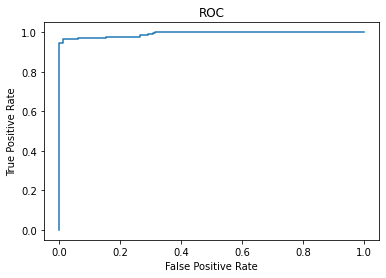

In [184]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate ,true_positive_rate )

# Creating binomial classification

In [186]:
# Building model 
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_transformed  ,y_train)

y_test_pred_prob1 =bnb.predict_proba(X_test_transformed)
y_test_pred_class1 =bnb.predict(X_test_transformed)

In [187]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test , y_test_pred_class1)


In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_test_pred_class1)

0.9770279971284996

In [189]:
TN = cm2[0,0]
FP = cm2[0,1]
FN = cm2[1,0]
TP = cm2[1,1]

senstivity = TP/(TP+FN)
specificity = TN/(TN+FP)
PositivepredictedRate = TP/(TP+FP)
Precesion =  PositivepredictedRate 
Recall = senstivity

print("sesitivity " ,senstivity)
print("specificity " ,specificity)
print("PositivepredictedRate", PositivepredictedRate)

print("Precession ", Precesion)
print("Recall ", Recall)

sesitivity  0.8324324324324325
specificity  0.9991721854304636
PositivepredictedRate 0.9935483870967742
Precession  0.9935483870967742
Recall  0.8324324324324325


# Graded questions solution

In [336]:
imdb = pd.read_csv('movie_review_train.csv')
imdb.head()

,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [337]:
#imdb['class'] = imdb['class'].map({'Pos':1, 'Neg':0})
#imdb['class'] = imdb['class'].astype(int)

In [338]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   1600 non-null   object
 1   text    1600 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


In [339]:
X_train = imdb.values[:,1]
y_train = imdb.values[:,0]

In [340]:
y_train

array(['Pos', 'Pos', 'Pos', ..., 'Neg', 'Neg', 'Neg'], dtype=object)

In [341]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words='english')

vec.fit(X_train)
imdbdict = vec.vocabulary_

In [342]:
print('imdb dict :',len(imdbdict))

imdb dict : 35858


In [343]:
vec1 = CountVectorizer(stop_words='english'  , min_df=0.03 , max_df=0.8)

vec1.fit(X_train)
imdbdict1 = vec1.vocabulary_
print('imdb dict :',len(imdbdict1))

imdb dict : 1643


In [344]:
# next step is to create the bag of words or sparse matrix 
X_train_transformed = vec1.transform(X_train)
X_train_transformed

<1600x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 217396 stored elements in Compressed Sparse Row format>

In [345]:
imdbtest = pd.read_csv('movie_review_test.csv')
#imdbtest['class'] = imdbtest['class'].map({'Pos':1, 'Neg':0})
#imdbtest['class'] = imdbtest['class'].astype('int')
imdbtest.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [346]:
X_test = imdbtest.values[:,1]
y_test = imdbtest.values[:,0]

In [347]:
X_test_transformed1 = vec1.transform(X_test)
X_test_transformed1

<400x1643 sparse matrix of type '<class 'numpy.int64'>'
	with 51663 stored elements in Compressed Sparse Row format>

In [348]:
y_test

array(['Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos', 'Pos',
       'Pos', 'Pos',

In [349]:
print(X_test_transformed1)

  (0, 11)	1
  (0, 18)	2
  (0, 23)	1
  (0, 29)	1
  (0, 31)	1
  (0, 53)	1
  (0, 73)	1
  (0, 94)	1
  (0, 110)	1
  (0, 118)	1
  (0, 133)	1
  (0, 134)	1
  (0, 140)	1
  (0, 141)	1
  (0, 151)	3
  (0, 152)	1
  (0, 173)	1
  (0, 176)	1
  (0, 177)	1
  (0, 188)	2
  (0, 189)	1
  (0, 195)	1
  (0, 197)	1
  (0, 203)	1
  (0, 206)	1
  :	:
  (399, 1314)	2
  (399, 1325)	1
  (399, 1354)	1
  (399, 1371)	1
  (399, 1375)	2
  (399, 1382)	1
  (399, 1399)	2
  (399, 1411)	1
  (399, 1416)	1
  (399, 1418)	1
  (399, 1430)	1
  (399, 1463)	2
  (399, 1471)	1
  (399, 1475)	1
  (399, 1514)	2
  (399, 1516)	1
  (399, 1542)	1
  (399, 1546)	2
  (399, 1549)	1
  (399, 1609)	3
  (399, 1632)	1
  (399, 1633)	3
  (399, 1637)	1
  (399, 1638)	1
  (399, 1641)	2


In [350]:
print(X_test_transformed1.count_nonzero())

51663


In [351]:
print(len(X_test_transformed1.toarray()))

400


In [352]:
# Train a bernoulli model 
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [353]:
# predicting the class and prob of test test
y_test_pred_class =  bnb.predict(X_test_transformed1)
y_test_pred_prob =  bnb.predict_proba(X_test_transformed1)


In [354]:
from sklearn.metrics import accuracy_score
aucrracyScore_testset = accuracy_score(y_test , y_test_pred_class)
print(aucrracyScore_testset)

0.79


In [355]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test , y_test_pred_class)
print(cm2)

[[177  23]
 [ 61 139]]


In [356]:
TN = cm2[0,0]
FP = cm2[0,1]
FN = cm2[1,0]
TP = cm2[1,1]

senstivity = TP/(TP+FN)
specificity = TN/(TN+FP)
PositivepredictedRate = TP/(TP+FP)
Precesion =  PositivepredictedRate 
Recall = senstivity

print("sesitivity " ,senstivity)
print("specificity " ,specificity)
print("PositivepredictedRate", PositivepredictedRate)

print("Precession ", Precesion)
print("Recall ", Recall)

sesitivity  0.695
specificity  0.885
PositivepredictedRate 0.8580246913580247
Precession  0.8580246913580247
Recall  0.695
